In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
data_path = 'https://www.statlearning.com/s/Advertising.csv'

data_df=pd.read_csv(data_path,index_col=0)

data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<function matplotlib.pyplot.show(close=None, block=None)>

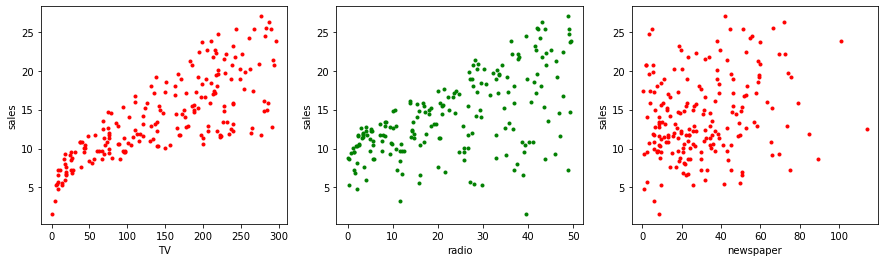

In [3]:
fig= plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

#sales vs Tv
ax= fig.add_subplot(gs[0])
ax.scatter(data_df["TV"],data_df["sales"],color='red',marker='.')
ax.set_xlabel('TV')
ax.set_ylabel('sales')

#sales vs radio
ax= fig.add_subplot(gs[1])
ax.scatter(data_df["radio"],data_df["sales"],color='green',marker='.')
ax.set_xlabel('radio')
ax.set_ylabel('sales')

#sales vs newspaper
ax= fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"],data_df["sales"],color='red',marker='.')
ax.set_xlabel('newspaper')
ax.set_ylabel('sales')

plt.show


In [4]:
### SIMPLE LINEAR REGRESSION WITH ORDINARY LEAST SQUARES

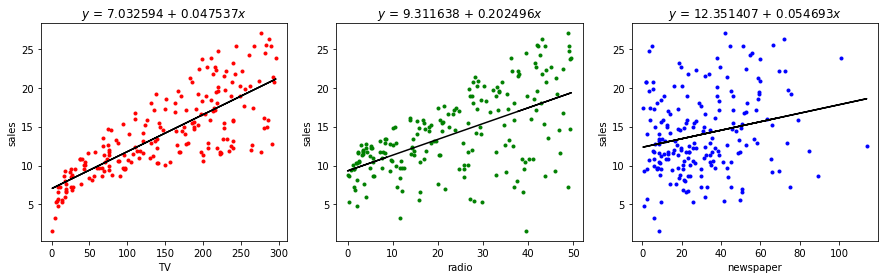

In [5]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

#function for training model and plotting
def train_plot(data_df, feature, ax,c):
    
    #initialize input and output
    X = data_df[[feature]].values
    Y = data_df[['sales']].values
    
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    n=len(X)
    
    numerator=0
    denominator=0
    for i in range(n):
        numerator += (X[i] - x_mean) * (Y[i]-y_mean)
        denominator += (X[i] - x_mean) ** 2
    
    b1 = numerator / denominator
    b0 = y_mean - (b1*x_mean)
    y_hat = b0 + np.dot(X,b1)
    
    #Plot the regression line
    ax.scatter(data_df[feature], data_df['sales'], color=c, marker='.')
    ax.plot(X, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
    
ax0 = fig.add_subplot(gs[0])
train_plot(data_df,'TV', ax0, 'red')

ax0 = fig.add_subplot(gs[1])
train_plot(data_df,'radio', ax0, 'green')

ax0 = fig.add_subplot(gs[2])
train_plot(data_df,'newspaper', ax0, 'blue')

plt.show()